## Import Packages

In [ ]:
import pandas as pd 
import numpy as np 
import plotly.express as px
import plotly.graph_objects as go

## Import Data

In [ ]:
connections_df = pd.read_csv('Connections.csv')
connections_df.head(10)

,First Name,Last Name,Email Address,Company,Position,Connected On
0,Dr. BADR,EL KHALYLY,NaN,Capgemini,Architecte de systèmes logiciels - Java - Spring,15 Sep 2022
1,Abdelouahed,Chbihi,NaN,Fondation MAScIR,Research and Development Project Manager,15 Sep 2022
2,MOHAMED,DHIOUI,NaN,LEONI Maroc,Plant Engineering Manager,11 Sep 2022
3,Gilbert,TON,NaN,NewCo Data Services,Cofondateur - Consultant Expert Data,09 Sep 2022
4,"Anass,""Nouri, Ph.D"",,Université Ibn Tofail,Ass...",NaN,NaN,NaN,NaN,NaN
5,Hanane,Boutzrout,NaN,Neoxia,Full-stack Developer,08 Sep 2022
6,Youssra,SAADEDDINE,NaN,Capgemini,Software Engineer,07 Sep 2022
7,Nada,El Ouahabi,NaN,Moore Stephens Casablanca,Consultante junior en expertise comptable,07 Sep 2022
8,Ayoub,CHETOUANI,NaN,Royal Air Maroc,React Native / React / Spring Boot Developer,06 Sep 2022
9,Oussama,Darouiche,NaN,Capgemini,Business Intelligence Engineer,05 Sep 2022


## EDA

In [ ]:
connections_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707 entries, 0 to 706
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   First Name     701 non-null    object
 1   Last Name      672 non-null    object
 2   Email Address  22 non-null     object
 3   Company        643 non-null    object
 4   Position       644 non-null    object
 5   Connected On   678 non-null    object
dtypes: object(6)
memory usage: 33.3+ KB


In [ ]:
connections_df.describe()

,First Name,Last Name,Email Address,Company,Position,Connected On
count,701,672,22,643,644,678
unique,463,664,22,478,541,174
top,Mohamed,.,huazhufu@gmail.com,Ecole des sciences de l'information [ESI],Data Scientist,29 Jul 2020
freq,17,2,1,12,17,140


In [ ]:
connections_df.isnull ()

,First Name,Last Name,Email Address,Company,Position,Connected On
0,False,False,True,False,False,False
1,False,False,True,False,False,False
2,False,False,True,False,False,False
3,False,False,True,False,False,False
4,False,True,True,True,True,True
...,...,...,...,...,...,...
702,False,False,True,False,False,False
703,False,False,True,False,False,False
704,False,False,True,False,False,False
705,False,False,True,False,False,False


In [ ]:
connections_df["Connected On"].dropna()

0      15 Sep 2022
1      15 Sep 2022
2      11 Sep 2022
3      09 Sep 2022
5      08 Sep 2022
          ...     
702    28 Jul 2020
703    28 Jul 2020
704    28 Jul 2020
705    28 Jul 2020
706    28 Jul 2020
Name: Connected On, Length: 678, dtype: object

In [ ]:
connections_df ["Connected On"] = pd.to_datetime(connections_df ["Connected On"])
connections_df ["Connected On"]

0     2022-09-15
1     2022-09-15
2     2022-09-11
3     2022-09-09
4            NaT
         ...    
702   2020-07-28
703   2020-07-28
704   2020-07-28
705   2020-07-28
706   2020-07-28
Name: Connected On, Length: 707, dtype: datetime64[ns]

## Visualisations

Number of Connecions 

In [ ]:
connections_line = px.line(connections_df.groupby(by='Connected On').count().reset_index(), 
                           x="Connected On", 
                           y="First Name", 
                           labels={'First Name': 'Number'},
                           title='My Connections')
connections_line.show()

### Which organizations do the people in my network work at? 

In [ ]:
connections_df['Company'].isnull().sum()

64

In [ ]:
connections_df['Company'] = connections_df['Company'].dropna()

In [ ]:
company_groupby = connections_df.groupby(by='Company').count().reset_index().sort_values(by='First Name', ascending=False).reset_index(drop=True)
company_groupby

,Company,First Name,Last Name,Email Address,Position,Connected On
0,Ecole des sciences de l'information [ESI],12,12,0,12,12
1,Capgemini,10,10,1,10,10
2,Orange Business Services,9,9,0,9,9
3,Confidential,9,9,0,9,9
4,Société Générale African Business Services,6,6,0,6,6
...,...,...,...,...,...,...
473,Europ Assistance,1,1,0,1,1
474,Esnad Business,1,1,0,1,1
475,Eslsca Paris - Campus Rabat,1,1,0,1,1
476,Entreprise,1,1,0,1,1


In [ ]:
# Bar Graph
fig = px.bar(company_groupby[:140],
      x='Company',
      y='First Name',
      labels={'First Name': 'Number'})
fig

In [ ]:
#  Treemap 
#  Treemaps display hierarchical data as a set of nested rectangles. 
#  Each group is represented by a rectangle, which area is proportional to its value.

fig = px.treemap(company_groupby[:100], path=['Company', 'Position'],
          values='First Name',
          labels={'First Name': 'Number'})
fig

With a treemap, it is easier to compare the proportion of one company related to the others! It looks like the majrity of my network are from my School "Ecole des Sciences de l'Information [ESI]". The second-largest percentage is from Capgemini, Confideniel and Orange.

### Top Common Positions

In [ ]:
connections_df['Position'].isnull ()

0      False
1      False
2      False
3      False
4       True
       ...  
702    False
703    False
704    False
705    False
706    False
Name: Position, Length: 707, dtype: bool

In [ ]:
connections_df['Position'].value_counts()[connections_df['Position'].value_counts()/len(connections_df) * 100 > 0.5]

Data Scientist                   17
Software Engineer                12
Stage de fin d’études             8
Data Analyst                      6
Data Engineer                     6
Data Science Intern               5
Stagiaire                         4
Full-stack Developer              4
Data Scientist Intern             4
Software Development Engineer     4
Name: Position, dtype: int64

In [ ]:
# Extract the position with frequency greater than 0.5%
fig = px.bar(connections_df.groupby(by='Position').count().sort_values(by='First Name', ascending=False)[:10].reset_index(),
       x='Position',
       y='First Name',
       labels={'First Name': 'Number'},
        title= 'Positions in my LinkedIn Network'
      )

fig.show()

It is great that the top common positions in my network are my target groups for networking "data scientist".

Some people might have titles start with "data scientist" but also have more words in their titles. Find out all the positions with words start with "Data scientist"

In [ ]:
connections_df.Position.str.startswith('Data Scientist').sum()

26

In [ ]:
positions = ' '.join(connections_df[~connections_df.Position.isnull()].Position.unique())

In [ ]:
# WordCloud

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline


def make_wordcloud(new_text):
    ''''function to make wordcloud'''
    
    wordcloud = WordCloud(width = 800, height = 800, 
                min_font_size = 10,
                background_color='black', 
                colormap='Set2', 
                collocations=False).generate(new_text) 
    
    #wordcloud.recolor(color_func = grey_color_func)

    
    fig = plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud, interpolation='bilinear') 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show() 
    
    return fig

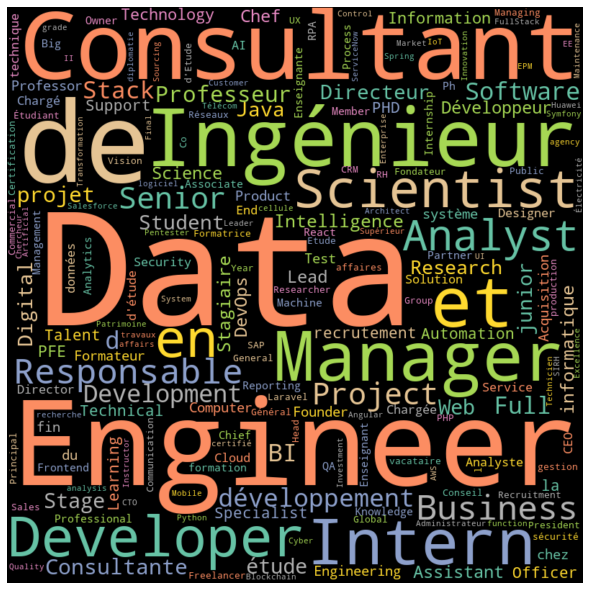

In [ ]:
wordcloud = make_wordcloud(positions)